export KAGGLE_API_TOKEN=KGAT_15c2f8a6c7c28527ec5a4b12864109f2
To use this token, set the KAGGLE_API_TOKEN environment variable:
export KAGGLE_API_TOKEN=KGAT_15c2f8a6c7c28527ec5a4b12864109f2

After setting KAGGLE_API_TOKEN, you can use the client as follows:
kaggle competitions list

In [1]:
pip install kaggle


In [2]:
import os

# Set your Kaggle API token
os.environ['KAGGLE_API_TOKEN'] = 'KGAT_15c2f8a6c7c28527ec5a4b12864109f2'


In [3]:
import json
import os

# Create kaggle.json dynamically
kaggle_token = os.environ['KAGGLE_API_TOKEN']

kaggle_json = {
    "username": "aasiasalahuddin",  # Replace with your Kaggle username
    "key": kaggle_token
}

# Write the JSON file
os.makedirs("/root/.kaggle", exist_ok=True)
with open("/root/.kaggle/kaggle.json", "w") as f:
    json.dump(kaggle_json, f)

# Set permissions
!chmod 600 /root/.kaggle/kaggle.json


In [4]:
#Download FIFA 21 dataset
!kaggle datasets download -d stefanoleone992/fifa-21-complete-player-dataset



Dataset URL: https://www.kaggle.com/datasets/stefanoleone992/fifa-21-complete-player-dataset
License(s): CC0-1.0
  0% 0.00/83.0M [00:00<?, ?B/s]
100% 83.0M/83.0M [00:00<00:00, 1.08GB/s]


In [7]:
#unzip dataset
!unzip fifa-21-complete-player-dataset.zip -d fifa21_dataset


Archive:  fifa-21-complete-player-dataset.zip
replace fifa21_dataset/Career Mode player datasets - FIFA 15-21.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: fifa21_dataset/Career Mode player datasets - FIFA 15-21.xlsx  
replace fifa21_dataset/players_15.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: fifa21_dataset/players_15.csv  
replace fifa21_dataset/players_16.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: fifa21_dataset/players_16.csv  
replace fifa21_dataset/players_17.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: fifa21_dataset/players_17.csv  
replace fifa21_dataset/players_18.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: fifa21_dataset/players_18.csv  
replace fifa21_dataset/players_19.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: fifa21_dataset/players_19.csv  
replace fifa21_dataset/players_20.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: fifa21_dataset/players_20.csv  
replace fifa21_dataset/p

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the CSV inside the zip is named "players_21.csv"
df = pd.read_csv("fifa21_dataset/players_21.csv")

# Preview the dataset
df.head()



,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


PART 1 NUMPY


In [17]:
# Select numerical columns
num_cols = df.select_dtypes(include=np.number).columns
num_array = df[num_cols].to_numpy()

# Display first 5 rows
#num_array[:5]

print("Shape:", num_array.shape)
print("Data type:", num_array.dtype)
print("Dimensions:", num_array.ndim)



Shape: (18944, 62)
Data type: float64
Dimensions: 2


In [19]:
# Vectorized operations
# Example: Overall rating
overall = df['overall'].to_numpy()

print("Mean:", np.mean(overall))
print("Median:", np.median(overall))
print("Std Dev:", np.std(overall))

# Element-wise operations
scaled_overall = overall * 2  # multiply
added_overall = overall + 5     # addition


Mean: 65.67778716216216
Median: 66.0
Std Dev: 7.002093123495678


In [22]:
# Indexing
print("First 5 players' overall:", overall[:5])

# Boolean filtering: players with overall > 85
top_players = overall[overall > 85]
print("Number of players with overall > 85:", len(top_players))

# Slicing
print("Overall of players 10 to 20:", overall[10:21])


First 5 players' overall: [93 92 91 91 91]
Number of players with overall > 85: 62
Overall of players 10 to 20: [90 90 89 89 89 89 89 89 88 88 88]


In [23]:
# Normalize 'overall' column to 0-1 range
overall_norm = (overall - np.min(overall)) / (np.max(overall) - np.min(overall))
overall_norm[:5]


array([1.        , 0.97826087, 0.95652174, 0.95652174, 0.95652174])

PART 2 PANDAS


In [27]:
# Load data
df = pd.read_csv("fifa21_dataset/players_21.csv")

# Basic info
print(df.head(5))

   sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     200389  https://sofifa.com/player/200389/jan-oblak/210002   
3     188545  https://sofifa.com/player/188545/robert-lewand...   
4     190871  https://sofifa.com/player/190871/neymar-da-sil...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   33  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   35  1985-02-05   
2           J. Oblak                            Jan Oblak   27  1993-01-07   
3     R. Lewandowski                   Robert Lewandowski   31  1988-08-21   
4          Neymar Jr        Neymar da Silva Santos Júnior   28  1992-02-05   

   height_cm  weight_kg nationality            club_name  ...   lwb   ldm  \
0        170         72   Argentina         FC Barc

In [26]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Columns: 106 entries, sofifa_id to rb
dtypes: float64(18), int64(44), object(44)
memory usage: 15.3+ MB
None


In [28]:
print(df.describe())

           sofifa_id           age     height_cm     weight_kg   league_rank  \
count   18944.000000  18944.000000  18944.000000  18944.000000  18719.000000   
mean   226242.402872     25.225823    181.190773     75.016892      1.357070   
std     27171.091056      4.697354      6.825672      7.057140      0.739327   
min        41.000000     16.000000    155.000000     50.000000      1.000000   
25%    210030.500000     21.000000    176.000000     70.000000      1.000000   
50%    232314.500000     25.000000    181.000000     75.000000      1.000000   
75%    246760.250000     29.000000    186.000000     80.000000      1.000000   
max    258970.000000     53.000000    206.000000    110.000000      4.000000   

            overall     potential     value_eur       wage_eur  \
count  18944.000000  18944.000000  1.894400e+04   18944.000000   
mean      65.677787     71.086729  2.224813e+06    8675.852513   
std        7.002278      6.109985  5.102486e+06   19654.774894   
min       47.00

In [29]:
# Handle missing values
df.fillna(0, inplace=True)  # or df.dropna()

In [30]:
# Fix data types
df['dob'] = pd.to_datetime(df['dob'], errors='coerce')
df['nationality'] = df['nationality'].astype('category')


In [31]:
# Fix data types
df['dob'] = pd.to_datetime(df['dob'], errors='coerce')
df['nationality'] = df['nationality'].astype('category')


PART B:  DATA MANIPULATION


In [41]:
# Filter players with overall > 85
high_rating = df[df['overall'] > 85]


In [43]:
# Select specific columns
high_rating[['short_name', 'overall', 'club_name', 'value_eur']].head()


,short_name,overall,club_name,value_eur
0,L. Messi,93,FC Barcelona,67500000
1,Cristiano Ronaldo,92,Juventus,46000000
2,J. Oblak,91,Atlético Madrid,75000000
3,R. Lewandowski,91,FC Bayern München,80000000
4,Neymar Jr,91,Paris Saint-Germain,90000000


In [44]:
# Using loc / iloc
print(df.loc[10:15, ['short_name', 'age', 'overall']])
print(df.iloc[10:15, 0:5])

      short_name  age  overall
10       S. Mané   28       90
11      M. Salah   28       90
12   T. Courtois   28       89
13     S. Agüero   32       89
14  Sergio Ramos   34       89
15    K. Benzema   32       89
    sofifa_id                                         player_url  \
10     208722  https://sofifa.com/player/208722/sadio-mane/21...   
11     209331  https://sofifa.com/player/209331/mohamed-salah...   
12     192119  https://sofifa.com/player/192119/thibaut-court...   
13     153079  https://sofifa.com/player/153079/sergio-aguero...   
14     155862  https://sofifa.com/player/155862/sergio-ramos-...   

      short_name                          long_name  age  
10       S. Mané                         Sadio Mané   28  
11      M. Salah                Mohamed Salah Ghaly   28  
12   T. Courtois                   Thibaut Courtois   28  
13     S. Agüero  Sergio Leonel Agüero del Castillo   32  
14  Sergio Ramos                Sergio Ramos García   34  


In [45]:
# Grouping & Aggregations: average overall per nationality
grouped = df.groupby('nationality')['overall'].mean().sort_values(ascending=False)
grouped.head(10)

/tmp/ipython-input-2248356148.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('nationality')['overall'].mean().sort_values(ascending=False)


,overall
nationality,
Tanzania,76.000000
Chad,73.000000
Mozambique,72.200000
Bermuda,72.000000
Armenia,71.500000
Libya,71.250000
Egypt,71.172414
New Caledonia,71.000000
Puerto Rico,71.000000


In [48]:
# Create a small dummy dataset to merge
club_df = pd.DataFrame({
    'club_name': ['Real Madrid', 'FC Barcelona', 'Juventus'],
    'league': ['La Liga', 'La Liga', 'Serie A']
})

merged_df = df.merge(club_df, on='club_name', how='left')
merged_df[['short_name', 'club_name', 'league']].head()


,short_name,club_name,league
0,L. Messi,FC Barcelona,La Liga
1,Cristiano Ronaldo,Juventus,Serie A
2,J. Oblak,Atlético Madrid,NaN
3,R. Lewandowski,FC Bayern München,NaN
4,Neymar Jr,Paris Saint-Germain,NaN


PART 3: DATA VISUALIZATION USING MATPLOTLIB

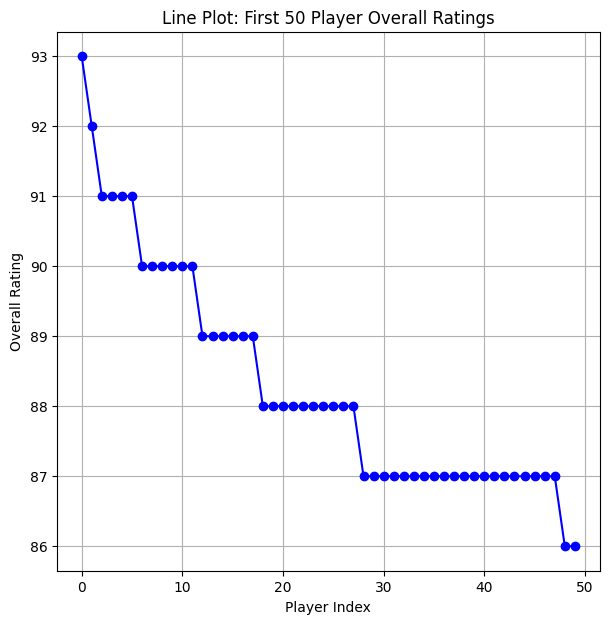

In [52]:
import matplotlib.pyplot as plt

# 1. Line Plot: Player Overall Ratings
plt.figure(figsize=(7,7))
plt.plot(df['overall'].values[:50], color='blue', marker='o')
plt.title("Line Plot: First 50 Player Overall Ratings")
plt.xlabel("Player Index")
plt.ylabel("Overall Rating")
plt.grid(True)
plt.show()

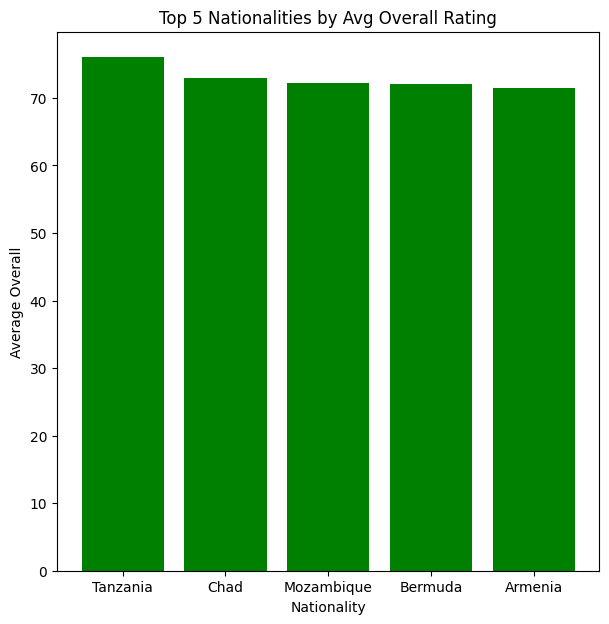

In [53]:
# 2. Bar Chart: Top 5 nationalities by average overall
top5_nation = grouped.head(5)
plt.figure(figsize=(7,7))
plt.bar(top5_nation.index, top5_nation.values, color='green')
plt.title("Top 5 Nationalities by Avg Overall Rating")
plt.xlabel("Nationality")
plt.ylabel("Average Overall")
plt.show()

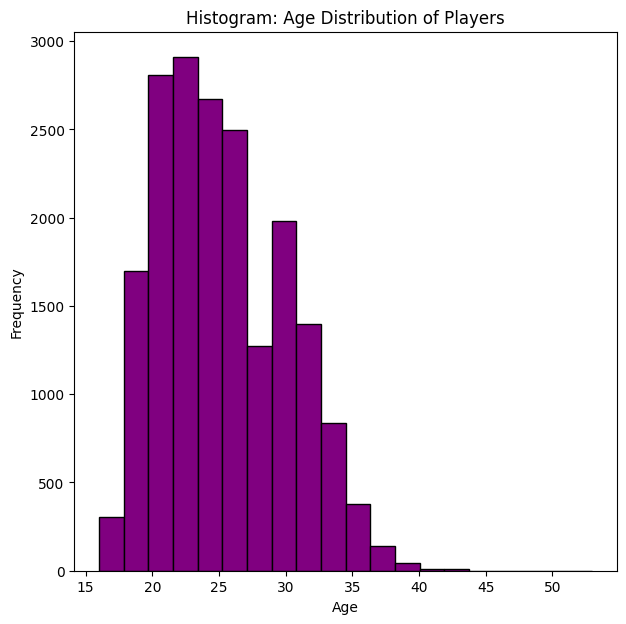

In [55]:
# 3. Histogram: Age distribution
plt.figure(figsize=(7,7))
plt.hist(df['age'], bins=20, color='purple', edgecolor='black')
plt.title("Histogram: Age Distribution of Players")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

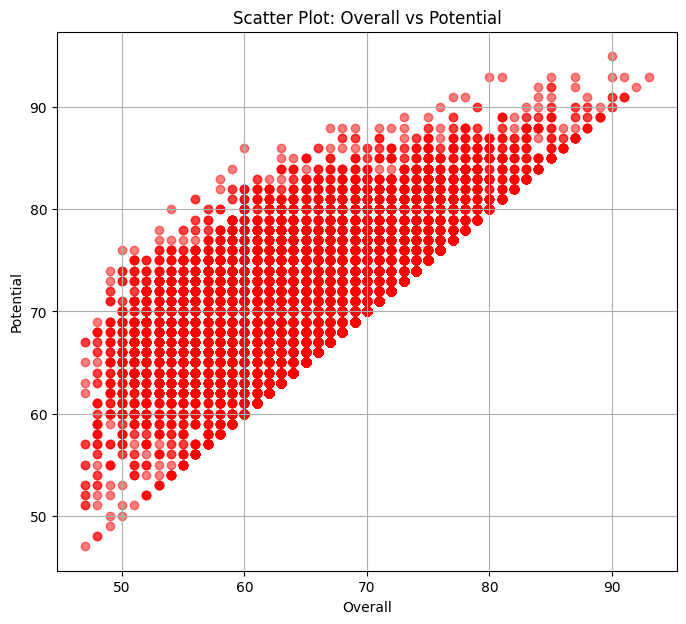

In [57]:
# 4. Scatter Plot: Overall vs Potential
plt.figure(figsize=(8,7))
plt.scatter(df['overall'], df['potential'], color='red', alpha=0.5)
plt.title("Scatter Plot: Overall vs Potential")
plt.xlabel("Overall")
plt.ylabel("Potential")
plt.grid(True)
plt.show()


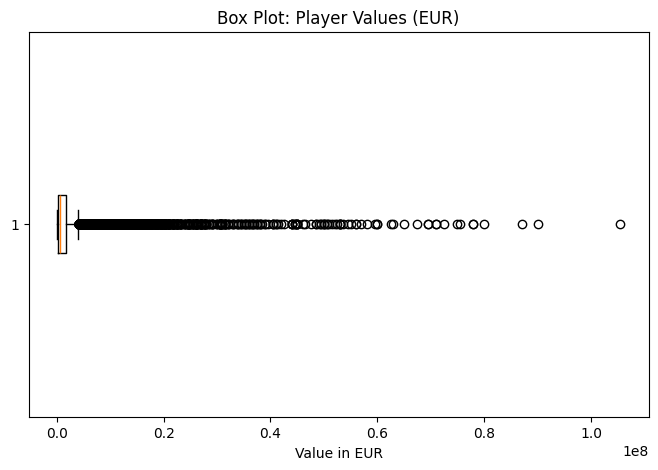

In [58]:
# 5. Box Plot: Value in Euros
plt.figure(figsize=(8,5))
plt.boxplot(df['value_eur'], vert=False)
plt.title("Box Plot: Player Values (EUR)")
plt.xlabel("Value in EUR")
plt.show()

PART 4: Advanced Visualization with Seaborn

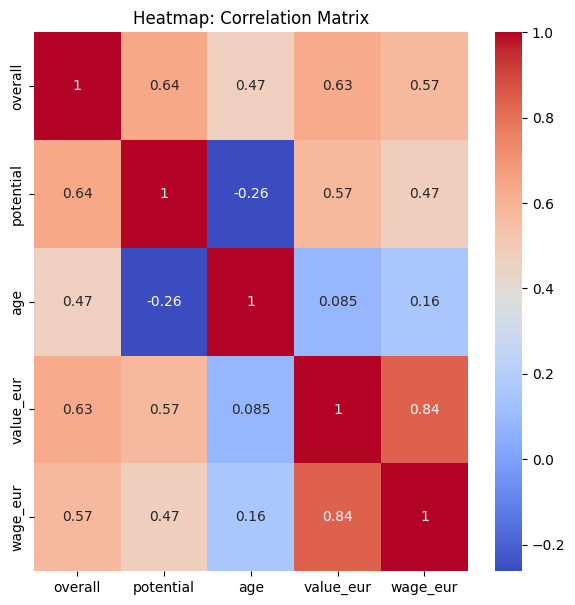

In [60]:
import seaborn as sns

# 1. Heatmap: Correlation
plt.figure(figsize=(7,7))
corr = df[['overall','potential','age','value_eur','wage_eur']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Heatmap: Correlation Matrix")
plt.show()

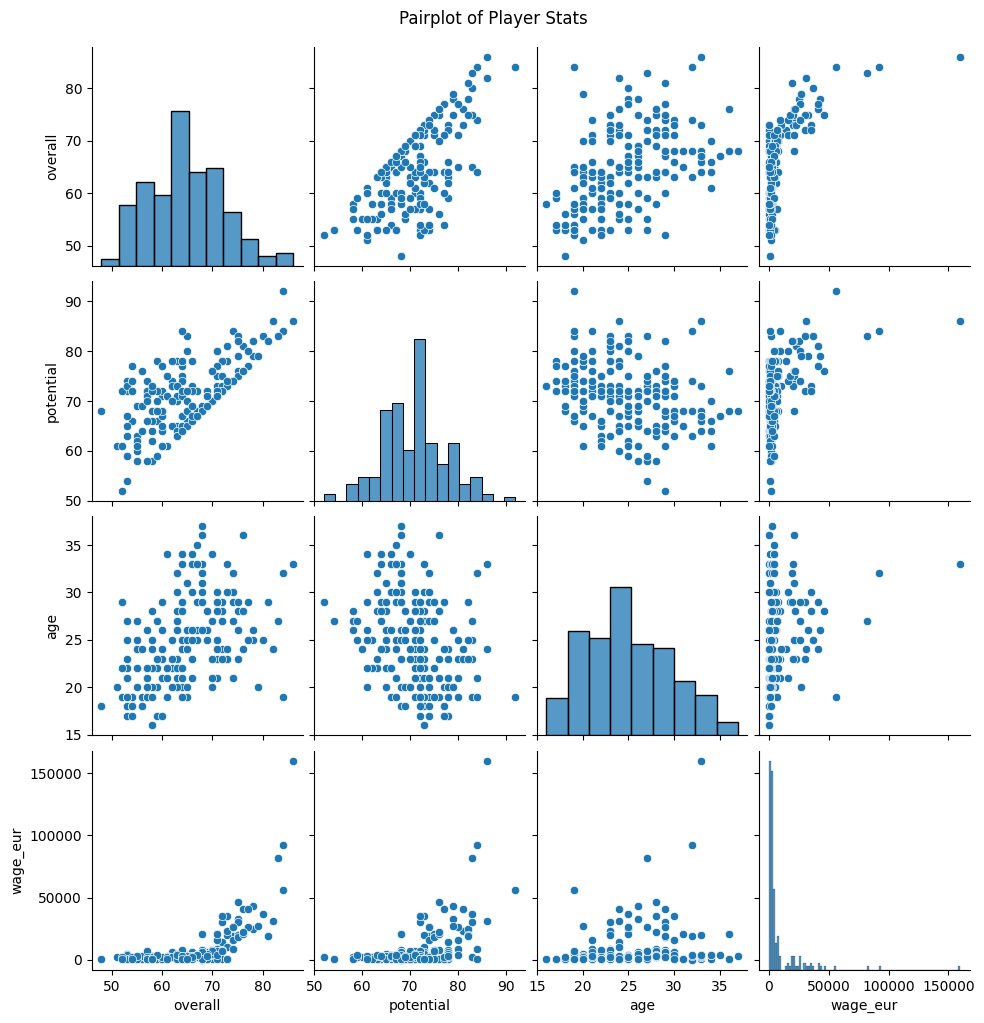

In [61]:
# 2. Pairplot: Overall, Potential, Age, Wage
sns.pairplot(df[['overall','potential','age','wage_eur']].sample(200))
plt.suptitle("Pairplot of Player Stats", y=1.02)
plt.show()

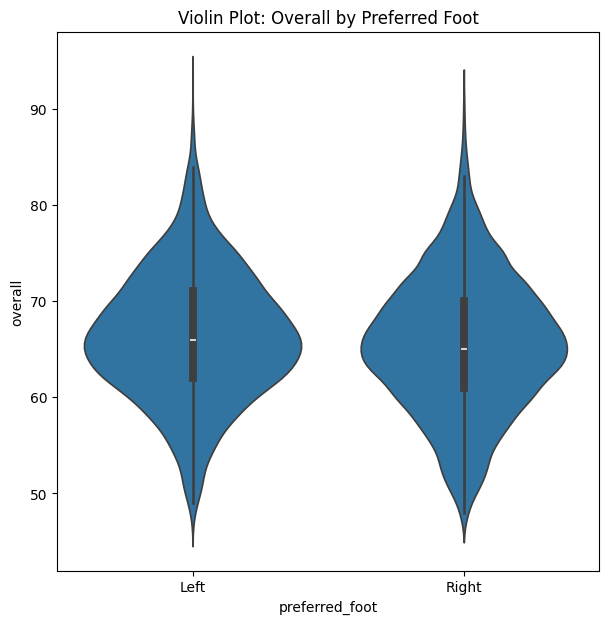

In [63]:
# 3. Violin Plot: Overall by Preferred Foot
plt.figure(figsize=(7,7))
sns.violinplot(x='preferred_foot', y='overall', data=df)
plt.title("Violin Plot: Overall by Preferred Foot")
plt.show()